# What is about 

OpenML - is large dataset collection for machine learning. 
It contains at least 45 datasets related to genes expressions. 
Here is example how to work with them.

Loading from openml collections 45 datesets related to genes expressions - microarray technology, cancer cells



https://www.ncbi.nlm.nih.gov/gds?term=GSE2109 
Seems origins of datasets is here

Can be found at openml dataset storage, for example:
https://www.openml.org/d/1163
GEMLeR provides a collection of gene expression datasets that can be used for benchmarking gene expression oriented machine learning algorithms. They can be used for estimation of different quality metrics (e.g. accuracy, precision, area under ROC curve, etc.) for classification, feature selection or clustering algorithms"
Can be found by feature number 10937


https://pdfs.semanticscholar.org/4088/4ec5bcd5fbe1626cd3c95179e2ac601a0097.pdf
Hindawi Publishing Corporation
Journal of Biomedicine and Biotechnology
Volume 2010, Article ID 616358, 9 pages
doi:10.1155/2010/616358
Research Article
Stability of Ranked Gene Lists in Large Microarray
Analysis Studies
Gregor Stiglic1 and Peter Kokol1, 2


-----------

To work with openml:

**1 )**

Basically we should know the "did" = dataset id, and then use two lines:

data = openml.datasets.get_dataset(did)

X, y, categorical_indicator, attribute_names = data.get_data(
      dataset_format="array", target=data.default_target_attribute )

**0 )**

To be aware of "did" (dataset id) we can load the information on all datasets first :

openml_df = openml.datasets.list_datasets(output_format="dataframe") # get pandas dataframe

and column "did" of that pandas  dataframe gives "did" , other columns contain other info 

See code below


Further docs: 

#see docs: https://docs.openml.org/Python-guide/

See also some code here:

https://datascience.stackexchange.com/a/84241/32240




# Install openml , get list of datasets, select Genes related datasets

In [1]:
pip install openml

     |████████████████████████████████| 158 kB 591 kB/s 
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=309c8a068f46850342e27f9c1da6ff2f03b7c44ee217e9fa611ff32ae1a3d3e6
  Stored in directory: /root/.cache/pip/wheels/9c/9e/f3/6a5ebf16527d7fe22d9bc1652bc9beb5dc9fcfdeb75e805400
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=69211aabf35df8ed54879056f6addc55793672d4fe6793d672df82267ab0a731
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import time

import openml

In [3]:
t0 = time.time()
openml_df = openml.datasets.list_datasets(output_format="dataframe")
print(time.time()-t0,'seconds passed ')

if 0: ## The same can be done with BIGGER lines of code
    openml_list = openml.datasets.list_datasets()  # returns a dict
    # Show a nice table with some key data properties
    openml_df = pd.DataFrame.from_dict(openml_list, orient="index")
    openml_df = datalist[["did", "name", "NumberOfInstances", "NumberOfFeatures", "NumberOfClasses"]]

    print(f"First 10 of {len(datalist)} datasets...")
    openml_df.head(n=10)


openml_df

2.347585678100586 seconds passed 


,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42706,42706,Flora,1,11601,active,arff,NaN,NaN,NaN,0.0,200001.0,99.0,0.0,0.0,200001.0,0.0
42708,42708,Flora,2,869,active,sparse_arff,NaN,NaN,NaN,0.0,200001.0,15000.0,0.0,0.0,200001.0,0.0
42710,42710,shapes,1,14227,active,ARFF,NaN,NaN,NaN,NaN,4.0,16000.0,0.0,0.0,3.0,1.0
42712,42712,Bike_Sharing_Demand,2,2,active,arff,NaN,NaN,NaN,0.0,13.0,17379.0,0.0,0.0,9.0,4.0


In [4]:
# Among all datasets there is subset of 45 datasets with  mircoarray Gene Expressions (mainly cancer) 
# can be selected by number of features == 10937
df_gemler = openml_df[ ( openml_df.NumberOfFeatures == 10937)    ].sort_values(["NumberOfInstances"], ascending=False)#.head(n=20)
print(df_gemler.shape)
df_gemler

(45, 16)


,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
1166,1166,OVA_Ovary,1,2,active,ARFF,1347.0,2.0,198.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1130,1130,OVA_Lung,1,2,active,ARFF,1419.0,2.0,126.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1138,1138,OVA_Uterus,1,2,active,ARFF,1421.0,2.0,124.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1146,1146,OVA_Prostate,1,2,active,ARFF,1476.0,2.0,69.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1134,1134,OVA_Kidney,1,2,active,ARFF,1285.0,2.0,260.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1142,1142,OVA_Endometrium,1,2,active,ARFF,1484.0,2.0,61.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1139,1139,OVA_Omentum,1,2,active,ARFF,1468.0,2.0,77.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1128,1128,OVA_Breast,1,2,active,ARFF,1201.0,2.0,344.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1161,1161,OVA_Colon,1,2,active,ARFF,1259.0,2.0,286.0,2.0,10937.0,1545.0,0.0,0.0,10936.0,1.0
1145,1145,AP_Breast_Colon,1,2,active,ARFF,344.0,2.0,286.0,2.0,10937.0,630.0,0.0,0.0,10936.0,1.0


# Load first five datasets

In [5]:
import time
list_datasets = []
for i in range(5):
  nm = df_gemler['name'].iloc[i]
  print(nm, i )
  did =  int( df_gemler['did'].iloc[i] )
  t0 = time.time()
  data = openml.datasets.get_dataset(did)
  X, y, categorical_indicator, attribute_names = data.get_data(
      dataset_format="array", target=data.default_target_attribute
  )
  dict_dataset_data = {'X':X, 'y': y, 'name':nm , 'did':did}  
  list_datasets.append(dict_dataset_data)
  print(X.shape, y.shape, 'X size byets:', X.size*X.itemsize,  time.time()-t0,'secs passed' )

OVA_Ovary 0
(1545, 10935) (1545,) X size byets: 67578300 33.71795463562012 secs passed
OVA_Lung 1
(1545, 10935) (1545,) X size byets: 67578300 32.99886441230774 secs passed
OVA_Uterus 2
(1545, 10935) (1545,) X size byets: 67578300 33.82888603210449 secs passed
OVA_Prostate 3
(1545, 10935) (1545,) X size byets: 67578300 32.5313355922699 secs passed
OVA_Kidney 4
(1545, 10935) (1545,) X size byets: 67578300 32.81839418411255 secs passed


# Create Plots 

OVA_Ovary
33.99098873138428 seconds passed
OVA_Lung
29.204971075057983 seconds passed
OVA_Uterus
28.580650806427002 seconds passed
OVA_Prostate
29.32325506210327 seconds passed
OVA_Kidney
28.675373315811157 seconds passed


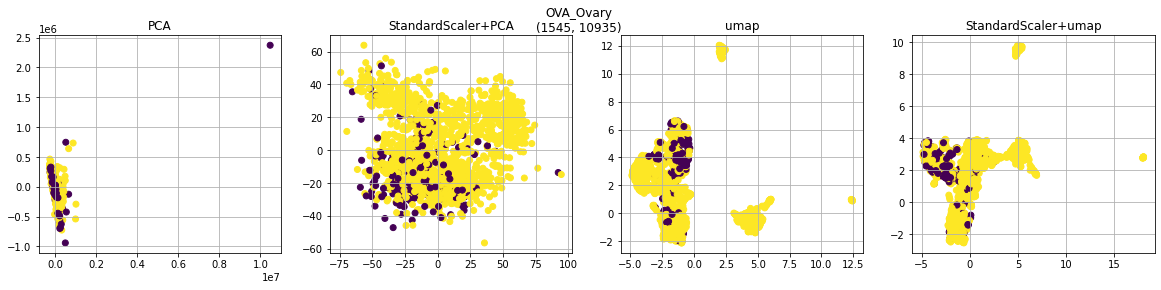

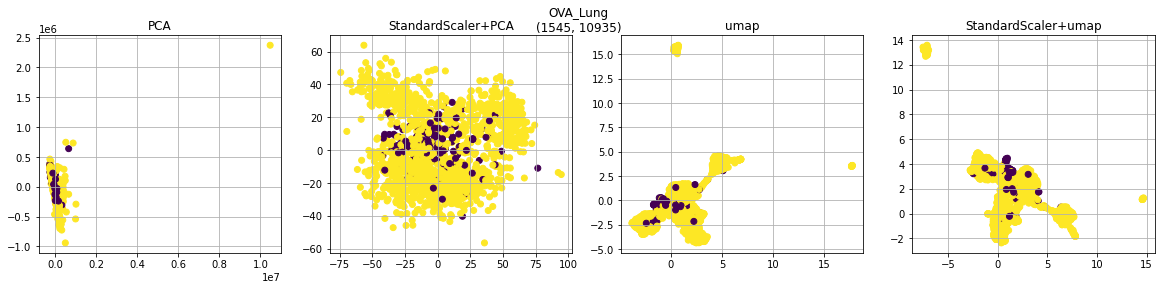

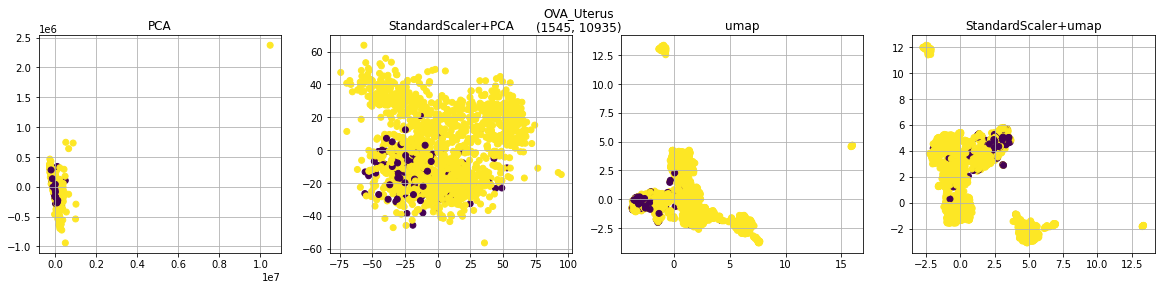

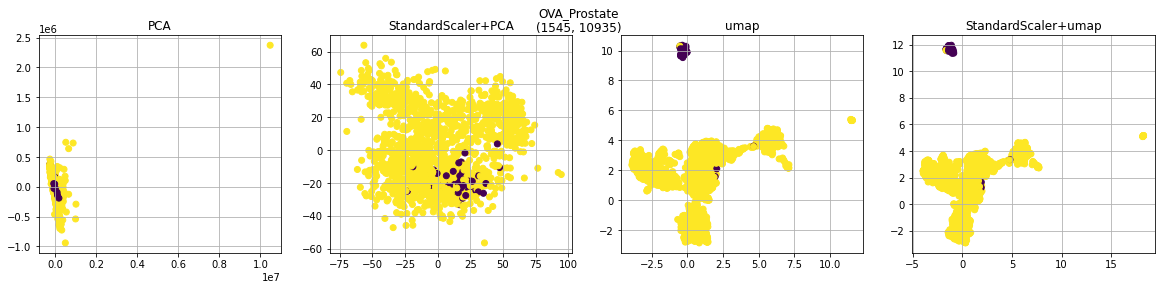

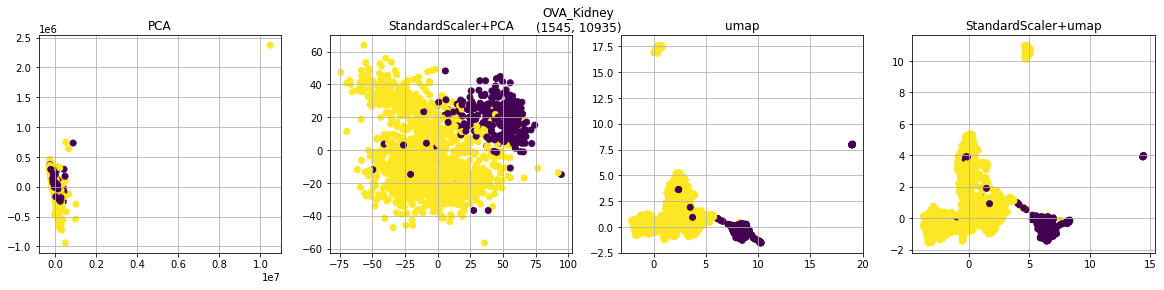

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for dict_dataset_data in list_datasets:
    X = dict_dataset_data['X']
    y = dict_dataset_data['y']
    nm = dict_dataset_data['name']
    
    print(nm)
    
    t0=time.time()
    fig = plt.figure(figsize = (20,4) )
    fig.suptitle(nm +'\n'+str(X.shape) )
    c = 0;  n_x_subplots = 4

    c += 1; fig.add_subplot(1,n_x_subplots,c)  
    X2 = PCA().fit_transform(X)
    plt.scatter(X2[:,0],X2[:,1]   , c = y )
    plt.title('PCA')
    plt.grid()
    
    c += 1; fig.add_subplot(1,n_x_subplots,c)  
    X2 = PCA().fit_transform(scaler.fit_transform(X) ) 
    plt.scatter(X2[:,0],X2[:,1]   , c = y )
    plt.title('StandardScaler+PCA')
    plt.grid()

    c += 1; fig.add_subplot(1,n_x_subplots,c)  
    X2 = umap.UMAP().fit_transform(scaler.fit_transform(X) ) 
    plt.scatter(X2[:,0],X2[:,1]   , c = y )
    plt.title('umap')
    plt.grid()
    
    c += 1; fig.add_subplot(1,n_x_subplots,c)  
    X2 = umap.UMAP().fit_transform(scaler.fit_transform(X) ) 
    plt.scatter(X2[:,0],X2[:,1]   , c = y )
    plt.title('StandardScaler+umap')
    plt.grid()
    
    print(time.time()-t0,'seconds passed')


plt.show()    